In [45]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import numpy as np
import os

RESULT_PATH = './results/'

def open_json(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data

#create graph for timing
def create_graph(data):
    timing_elements = data['timing'][0].keys()

    fig, ax = plt.subplots(figsize=(12,7))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    fig.suptitle('Timing and Peak Memory Boxplots of command:\n'+' '.join(data['command']), fontsize=14)
    
    ax1 = plt.subplot(gs[0])
    boxplot_data = [[d[element] for d in data['timing']] for element in timing_elements]
    boxplot = ax1.boxplot(boxplot_data)
    ax1.set_ylim(0, np.max(boxplot_data)*1.05)
    ax1.set_xticklabels(timing_elements)
    ax1.set_ylabel('Seconds')
    ax1.set_xlabel('Timing')

    for median in boxplot['medians']:
        x, y = median.get_xydata()[1] 
        print(x, y)
        ax1.text(x, y, f'{y:.3f}', ha='center', va='bottom', fontweight='bold')

    ax2 = plt.subplot(gs[1])
    boxplot = ax2.boxplot(data['peak_mem'])
    x, y = boxplot['medians'][0].get_xydata()[1]
    ax2.text(x, y, f'{y:.3f}', ha='center', va='bottom', fontweight='bold')
    #ax2.set_ylim(0, np.max(data['peak_mem'])*1.05)
    ax2.set_xlabel('KiloBytes')
    ax2.set_ylabel('Peak Memory')

    plt.tight_layout()
    plt.show()

['archive', 'normalize_matrix', 'addition', 'addition_readMatrix', 'transpose_addition']
['normalize_matrix', 'addition', 'addition_readMatrix', 'transpose_addition']
#############################################
########## normalize_matrix ##########
#############################################
1.25 0.00379944
2.25 0.00647508
3.25 0.100876
4.25 3.46684
5.25 3.6082


/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


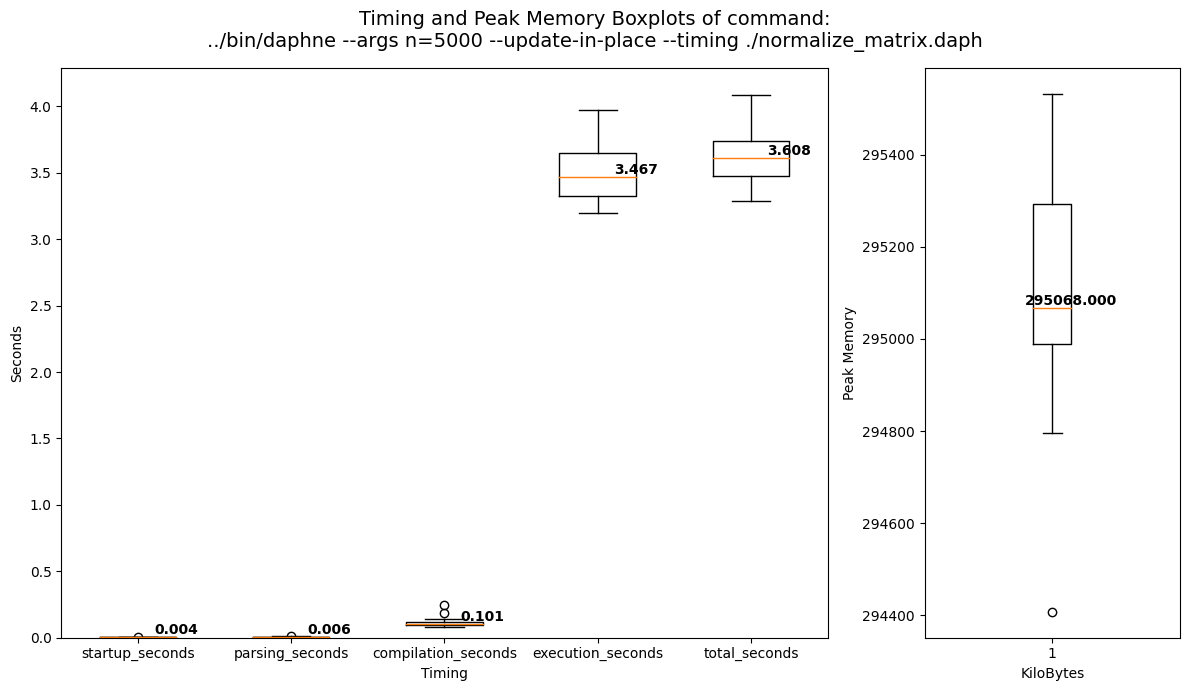

/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


1.25 0.0033983399999999997
2.25 0.0054473149999999994
3.25 0.10406499999999999
4.25 0.034072149999999995
5.25 0.153867


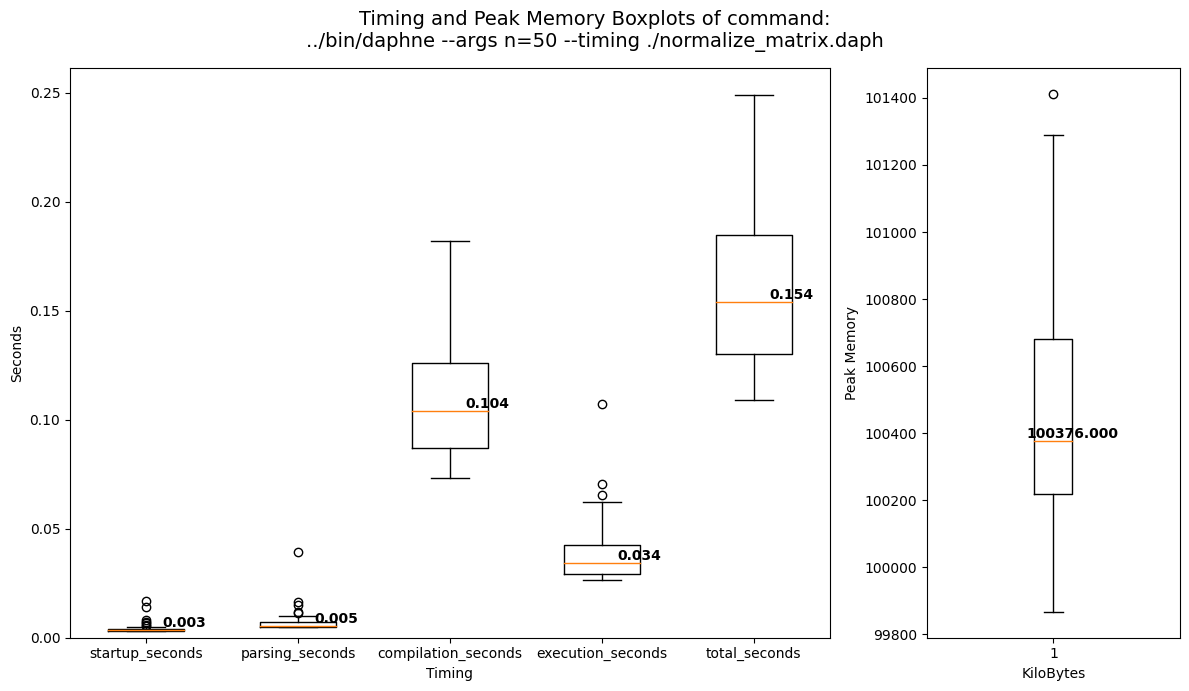

/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


1.25 0.003487155
2.25 0.005430025
3.25 0.110782
4.25 0.033639100000000005
5.25 0.160498


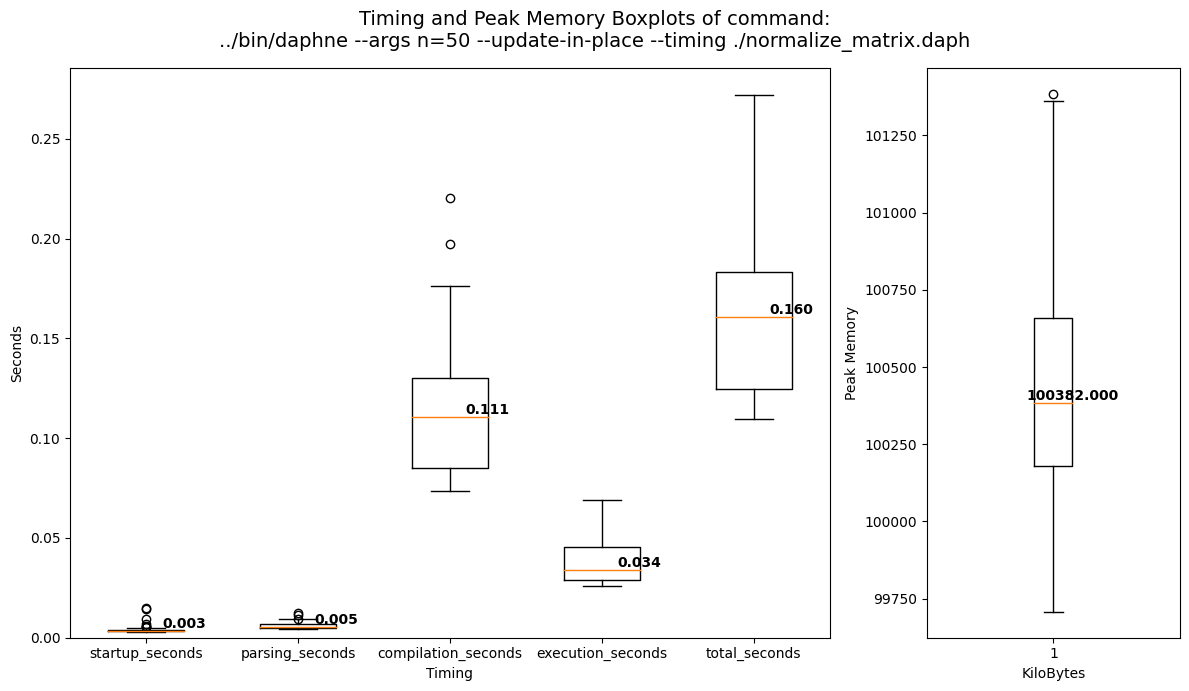

#############################################
########## addition ##########
#############################################
1.25 0.0032346550000000003
2.25 0.004762195
3.25 0.0899187
4.25 0.02882975
5.25 0.1288655


/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


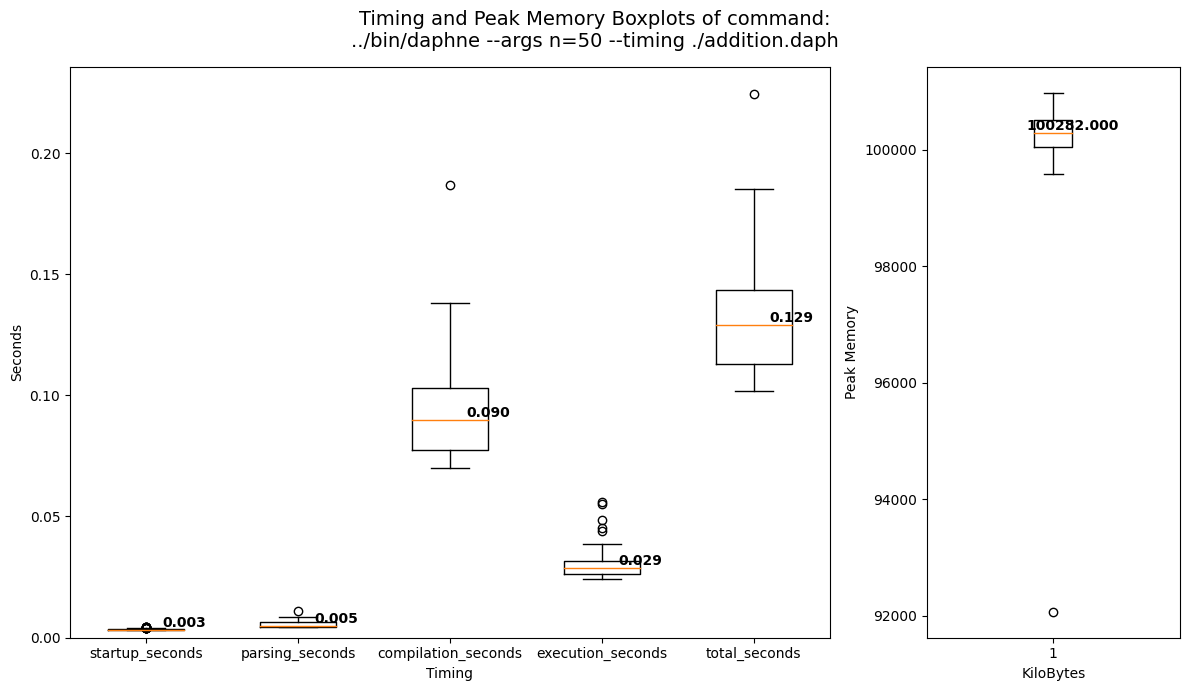

/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


1.25 0.00322252
2.25 0.00476746
3.25 0.08833769999999999
4.25 0.02780815
5.25 0.1259185


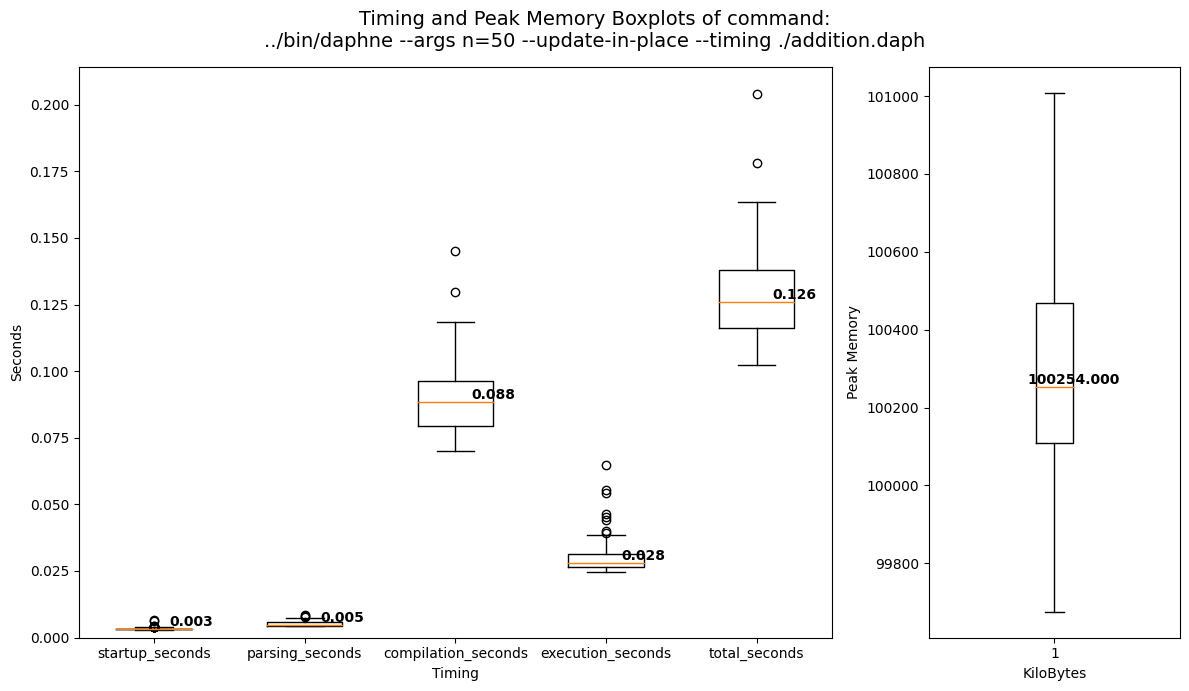

#############################################
########## addition_readMatrix ##########
#############################################
1.25 0.00340021
2.25 0.004977280000000001
3.25 0.09408375
4.25 0.03126935
5.25 0.135261


/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


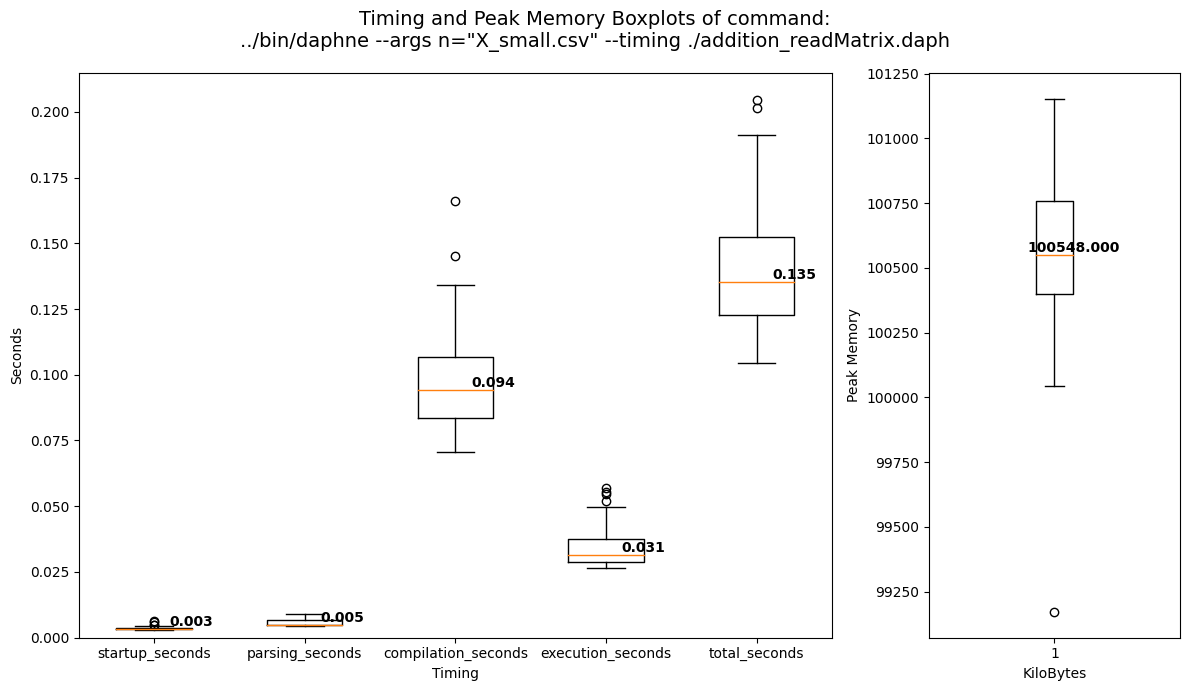

/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


1.25 0.00336936
2.25 0.004991385
3.25 0.09277125
4.25 0.0309753
5.25 0.134987


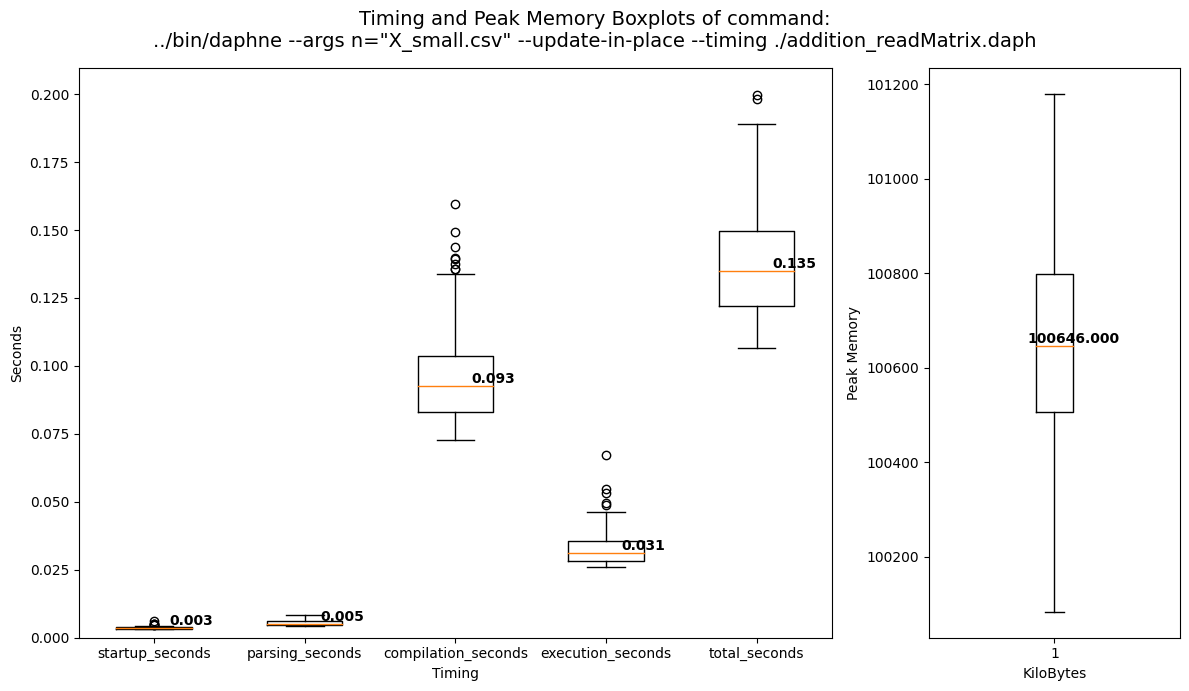

#############################################
########## transpose_addition ##########
#############################################
1.25 0.00324656
2.25 0.00524408
3.25 0.08829970000000001
4.25 0.0292719
5.25 0.128642


/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


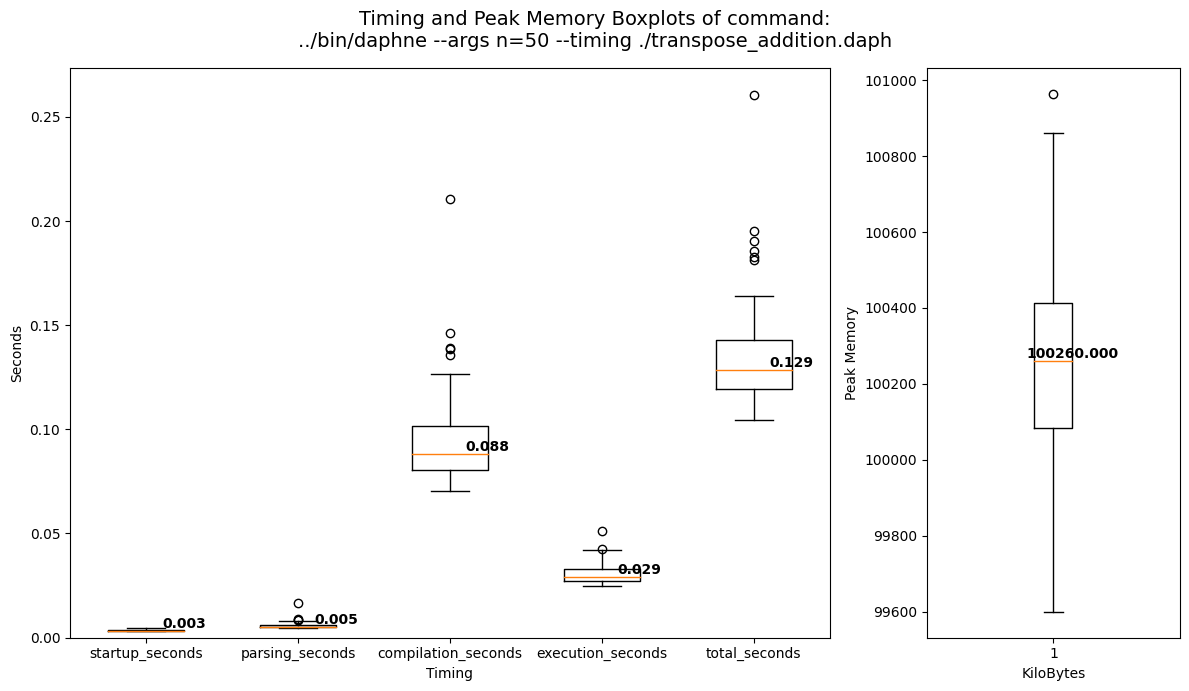

/tmp/ipykernel_54230/3085087636.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


1.25 0.00335754
2.25 0.00566314
3.25 0.0943914
4.25 0.03034105
5.25 0.13416450000000002


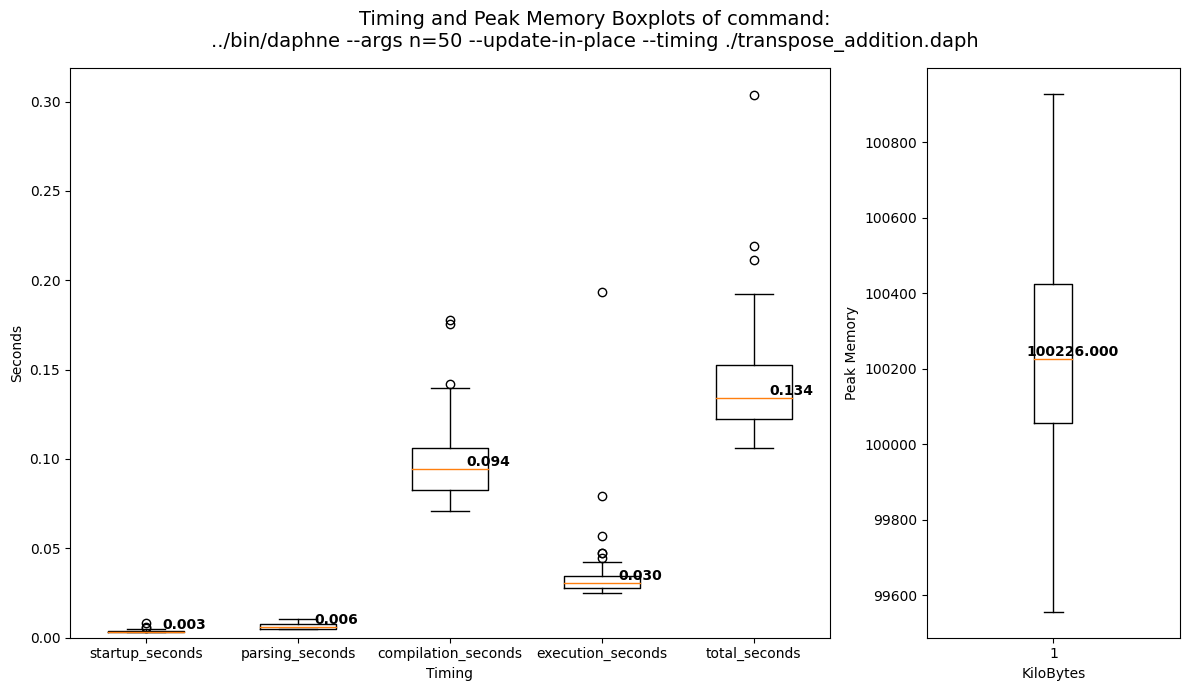

In [46]:
dirs = [d for d in os.listdir(RESULT_PATH) if os.path.isdir(os.path.join(RESULT_PATH, d))]
print(dirs)
dirs = [d for d in dirs if not d.startswith('archive')]
print(dirs)

for dir in dirs:
    #get all files in directory recursively
    print("#############################################")
    print("########## "+dir+" ##########")
    print("#############################################")
    path = os.path.join(RESULT_PATH, dir)
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    files = [f for f in files if f.endswith('.json')]
    files = [os.path.join(path, f) for f in files]
    files.sort()

    for file in files:
        data = open_json(file)
        create_graph(data)